In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image_path = "img1.jpg"
image = cv2.imread(image_path)

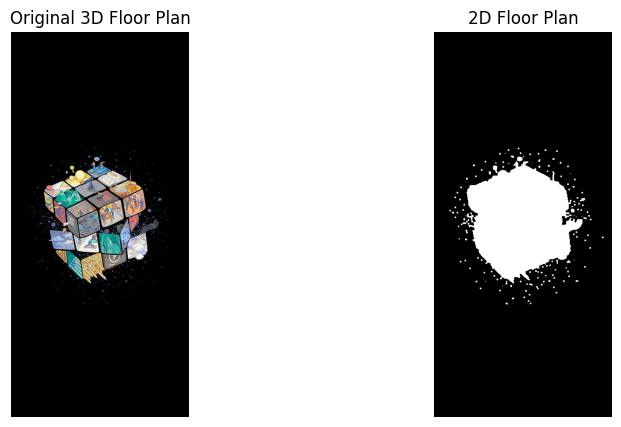

In [3]:
if image is None:
    print("Error: Unable to load the image.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)
    kernel = np.ones((3, 3), np.uint8)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours from the edge-detected image
    contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image to draw the floor plan
    floor_plan = np.zeros_like(gray_image)

    # Draw the contours on the blank image
    cv2.drawContours(floor_plan, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original 3D Floor Plan')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(floor_plan, cmap='gray')
    plt.title('2D Floor Plan')
    plt.axis('off')

    plt.show()

    # Optionally, save the 2D floor plan to a file
    cv2.imwrite("2d_floor_plan.png", floor_plan)
